In [3]:
import numpy as np
import GPy
from matplotlib import pyplot as plt
import climin
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.figsize'] = 8,8

N=5000
X = np.random.rand(N)[:, None]
Y1 = np.sin(6*X) + 0.1*np.random.randn(N,1)
Y2 = np.sin(3*X) + 0.1*np.random.randn(N,1)
Y = np.hstack((Y1, Y2))

batchsize = 10
num_inducing_points = 20
iterations = 1000

X_variance = None

Z = np.random.rand(num_inducing_points,1)

# + GPy.kern.White(1)
m = GPy.core.SVGP(X, Y, Z, GPy.kern.RBF(1) , GPy.likelihoods.Gaussian(), batchsize=batchsize)
#m.kern.white.variance = 1e-5
#m.kern.white.fix()

opt = climin.Adadelta(m.optimizer_array, m.stochastic_grad, step_rate=0.2, momentum=0.9)
from ipywidgets import Text
from IPython.display import display

t = Text(align='right')
display(t)

import sys
def callback(i):
    t.value = str(m.log_likelihood())
    #Stop after 5000 iterations
    if i['n_iter'] > num_inducing_points:
        return True
    return False
info = opt.minimize_until(callback)

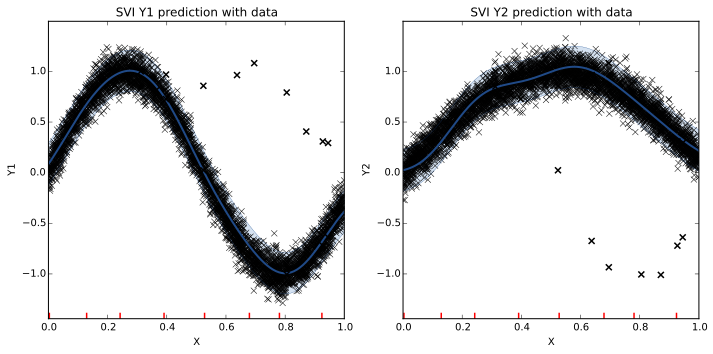

In [4]:
fig1, axes = plt.subplots(1, 2, figsize=(10,5))
ax = axes[0]
ax.plot(X, Y1, 'kx', alpha=0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y1')
ax.set_title('SVI Y1 prediction with data')
_ = m.plot(which_data_ycols=[0], plot_limits=(X.min(),X.max()), ax=ax)
ax.set_xlim((X.min(),X.max()))

ax = axes[1]
ax.plot(X, Y2, 'kx', alpha=0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y2')
ax.set_title('SVI Y2 prediction with data')
_ = m.plot(which_data_ycols=[1], plot_limits=(X.min(),X.max()), ax=ax)
ax.set_xlim((X.min(),X.max()))

fig1.tight_layout()